In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras import regularizers
from sklearn.metrics import roc_curve, auc
from keras.layers import Activation
from keras import backend as K

In [2]:
# load saved df
df = pd.read_pickle('test.pkl')
print (df.keys())

Index([      b'pt_of_muon',      b'eta_of_muon',      b'phi_of_muon',
         b'energy_of_muon',        b'hcal_ieta',        b'hcal_iphi',
           b'IsolationR04',     b'IsolationR03',      b'ecal_3into3',
            b'hcal_3into3',         b'ecal_3x3',         b'hcal_1x1',
       'b'hcal_edepth1'_x', 'b'hcal_edepth2'_x', 'b'hcal_edepth3'_x',
       'b'hcal_edepth4'_x', 'b'hcal_edepth5'_x', 'b'hcal_edepth6'_x',
       'b'hcal_edepth7'_x', 'b'hcal_edepth1'_y', 'b'hcal_edepth2'_y',
       'b'hcal_edepth3'_y', 'b'hcal_edepth4'_y', 'b'hcal_edepth5'_y',
       'b'hcal_edepth6'_y', 'b'hcal_edepth7'_y'],
      dtype='object')


In [3]:
# filter events
ieta=24
df = df.loc[abs(df[b'hcal_ieta']) == ieta]

df = df.loc[df["b'hcal_edepth1'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth1'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth2'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth2'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth3'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth3'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth4'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth4'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth5'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth5'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth6'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth6'_y"] > 0.00001]

if ieta in range (26,28):
    df = df.loc[df["b'hcal_edepth7'_x"] > 0.00001]
    df = df.loc[df["b'hcal_edepth7'_y"] > 0.00001]


In [4]:
df["b'hcal_edepth1'_x"]=np.log(10000*df["b'hcal_edepth1'_x"])
df["b'hcal_edepth1'_y"]=np.log(10000*df["b'hcal_edepth1'_y"])

df["b'hcal_edepth2'_x"]=np.log(10000*df["b'hcal_edepth2'_x"])
df["b'hcal_edepth2'_y"]=np.log(10000*df["b'hcal_edepth2'_y"])

df["b'hcal_edepth3'_x"]=np.log(10000*df["b'hcal_edepth3'_x"])
df["b'hcal_edepth3'_y"]=np.log(10000*df["b'hcal_edepth3'_y"])

df["b'hcal_edepth4'_x"]=np.log(10000*df["b'hcal_edepth4'_x"])
df["b'hcal_edepth4'_y"]=np.log(10000*df["b'hcal_edepth4'_y"])

df["b'hcal_edepth5'_x"]=np.log(10000*df["b'hcal_edepth5'_x"])
df["b'hcal_edepth5'_y"]=np.log(10000*df["b'hcal_edepth5'_y"])

df["b'hcal_edepth6'_x"]=np.log(10000*df["b'hcal_edepth6'_x"])
df["b'hcal_edepth6'_y"]=np.log(10000*df["b'hcal_edepth6'_y"])

if ieta in range (26,28):
    df["b'hcal_edepth7'_x"]=np.log(10000*df["b'hcal_edepth7'_x"])
    df["b'hcal_edepth7'_y"]=np.log(10000*df["b'hcal_edepth7'_y"])

In [5]:
# keep originals before scaling
df['hcal_edepth1_un'] = df["b'hcal_edepth1'_x"]
df['hcal_edepth2_un'] = df["b'hcal_edepth2'_x"]
df['hcal_edepth3_un'] = df["b'hcal_edepth3'_x"]
df['hcal_edepth4_un'] = df["b'hcal_edepth4'_x"]
df['hcal_edepth5_un'] = df["b'hcal_edepth5'_x"]
df['hcal_edepth6_un'] = df["b'hcal_edepth6'_x"]
df['hcal_edepth7_un'] = df["b'hcal_edepth7'_x"]

df['hcal_ieta_un'] = df[b'hcal_ieta']

In [6]:
# scaling input vars
cols_to_minmax =[b'pt_of_muon',b'eta_of_muon',b'phi_of_muon',b'energy_of_muon',b'hcal_ieta',
                b'hcal_iphi',     b'IsolationR04',     b'IsolationR03',
                b'ecal_3into3',      b'hcal_3into3', 
                b'ecal_3x3',         b'hcal_1x1',
               "b'hcal_edepth1'_x", "b'hcal_edepth2'_x", "b'hcal_edepth3'_x",
               "b'hcal_edepth4'_x", "b'hcal_edepth5'_x", "b'hcal_edepth6'_x",
               "b'hcal_edepth7'_x"]


df[cols_to_minmax] = df[cols_to_minmax].apply(lambda x: (x - x.min()) /  (x.max() - x.min()))

b'pt_of_muon'


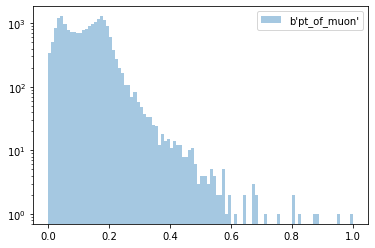

b'eta_of_muon'


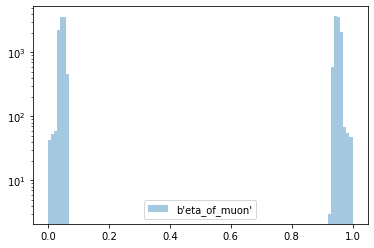

b'phi_of_muon'


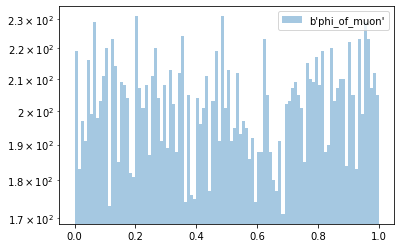

b'energy_of_muon'


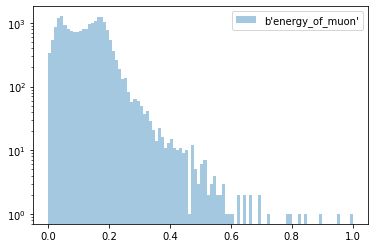

b'hcal_ieta'


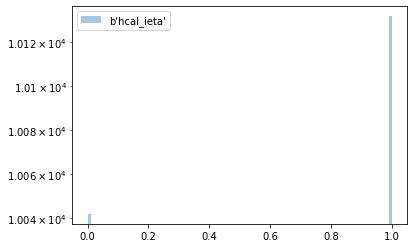

b'hcal_iphi'


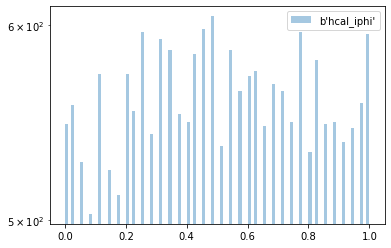

b'IsolationR04'


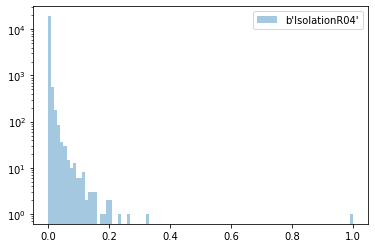

b'IsolationR03'


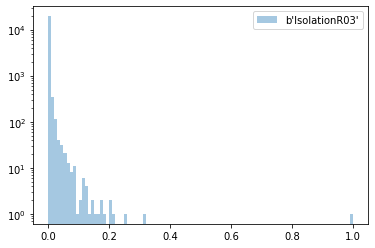

b'ecal_3into3'


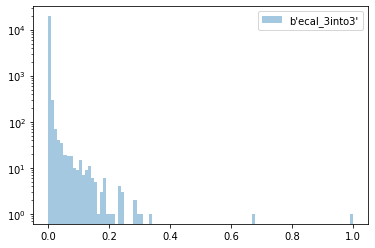

b'hcal_3into3'


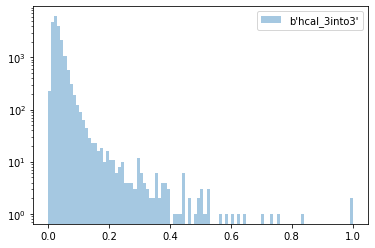

b'ecal_3x3'


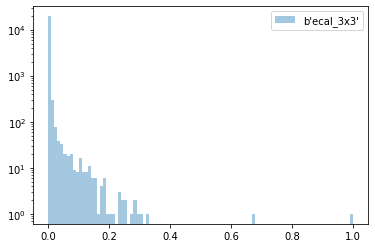

b'hcal_1x1'


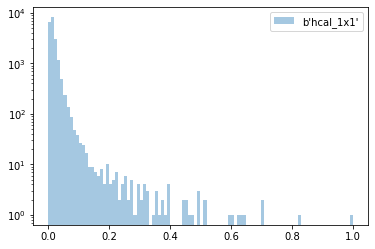

b'hcal_edepth1'_x


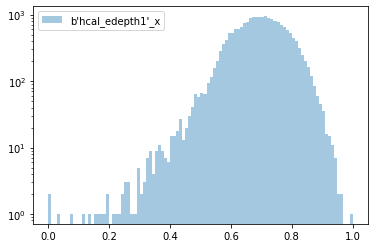

b'hcal_edepth2'_x


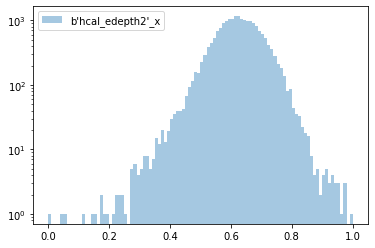

b'hcal_edepth3'_x


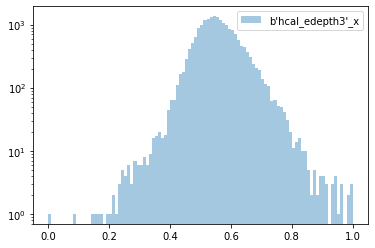

b'hcal_edepth4'_x


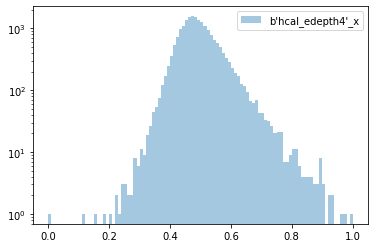

b'hcal_edepth5'_x


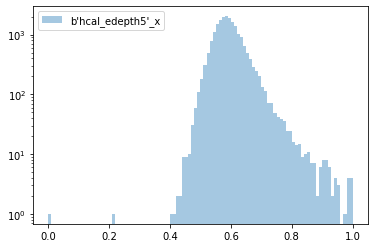

b'hcal_edepth6'_x


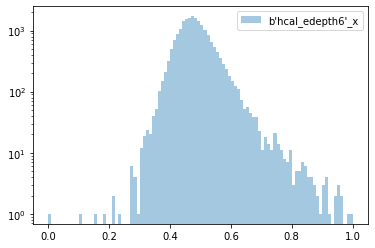

b'hcal_edepth7'_x
b'hcal_edepth1'_y


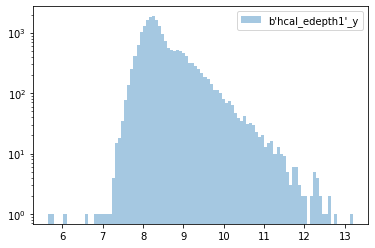

b'hcal_edepth2'_y


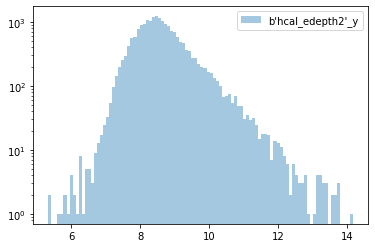

b'hcal_edepth3'_y


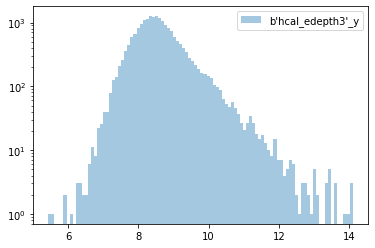

b'hcal_edepth4'_y


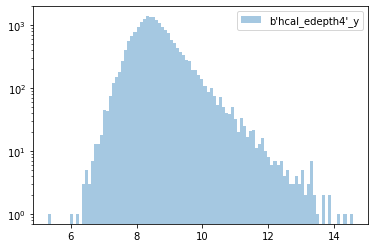

b'hcal_edepth5'_y


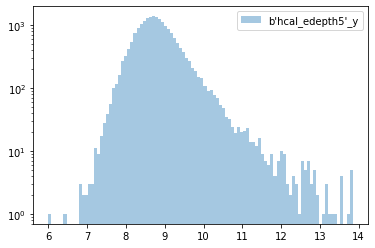

b'hcal_edepth6'_y


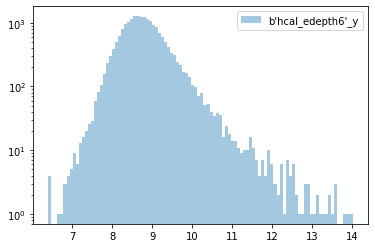

b'hcal_edepth7'_y
hcal_edepth1_un


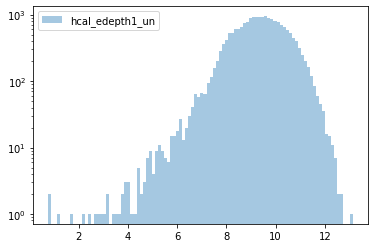

hcal_edepth2_un


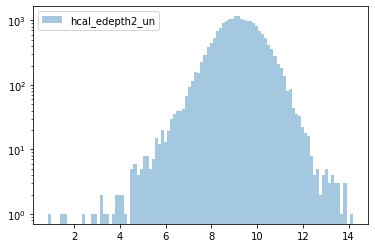

hcal_edepth3_un


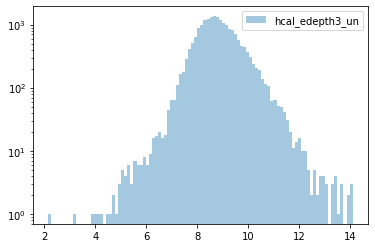

hcal_edepth4_un


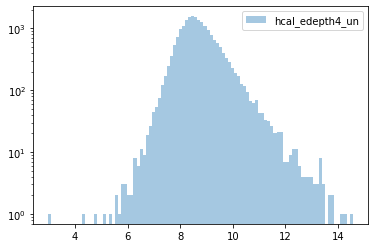

hcal_edepth5_un


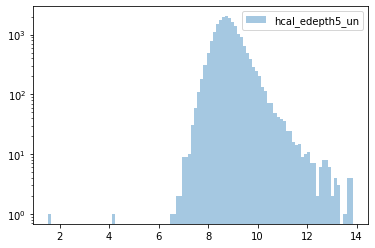

hcal_edepth6_un


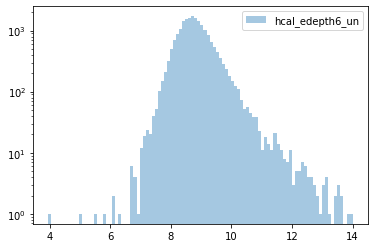

hcal_edepth7_un


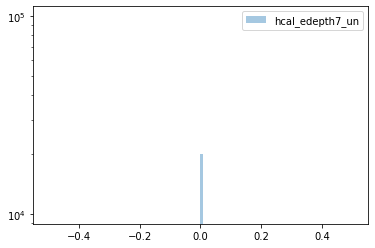

hcal_ieta_un


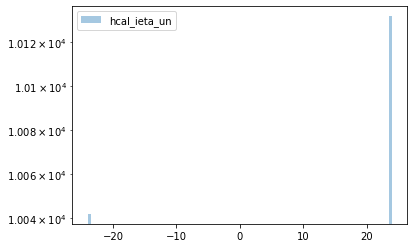

In [7]:
#print(ieta)
for i in (df.keys()):
    print (i)
    if ieta in range (22,26):
        if i == "b'hcal_edepth7'_x":
            continue
        if i == "b'hcal_edepth7'_y":
            continue
        if i == "b'hcal_edepth7'_un":
            continue
    plt.hist(df[i],bins=100,label=str(i),alpha=0.4)
    plt.yscale("log")
    plt.legend()
    plt.show()

In [8]:
data = df.values
print (data)
ntest = 20000
testindx = data.shape[0] - ntest

X_train_depth1 = data[:testindx,np.r_[0:12,12]]
X_train_depth2 = data[:testindx,np.r_[0:12,13]]
X_train_depth3 = data[:testindx,np.r_[0:12,14]]
X_train_depth4 = data[:testindx,np.r_[0:12,15]]
X_train_depth5 = data[:testindx,np.r_[0:12,16]]
X_train_depth6 = data[:testindx,np.r_[0:12,17]]
X_train_depth7 = data[:testindx,np.r_[0:12,18]]

Y_train = data[:testindx,20]               
X_test = data[testindx:,:]
print (X_test.shape) 
#print ("shape of X_train:",X_train.shape)
print ("shape of Y_train:",Y_train.shape)

[[ 9.07887316e-02  4.01294307e-02  7.93260999e-01 ...  8.40019401e+00
   0.00000000e+00 -2.40000000e+01]
 [ 1.33289269e-02  4.07185581e-02  2.41864174e-02 ...  7.90052464e+00
   0.00000000e+00 -2.40000000e+01]
 [ 1.82199363e-01  9.48855163e-01  3.00251982e-01 ...  9.30347714e+00
   0.00000000e+00  2.40000000e+01]
 ...
 [ 8.98218332e-02  9.46049313e-01  1.39478662e-01 ...  7.86417217e+00
   0.00000000e+00  2.40000000e+01]
 [ 1.26677735e-01  9.43310949e-01  2.42257056e-01 ...  9.01937738e+00
   0.00000000e+00  2.40000000e+01]
 [ 4.32922047e-02  9.54043501e-01  9.12423050e-01 ...  9.34817742e+00
   0.00000000e+00  2.40000000e+01]]
(20000, 34)
shape of Y_train: (174,)


true_hist[0] =  [98 69  6  1]
sum weight: 100.0
true_hist [98 69  6  1]
binweight [ 1.21648461  0.85650447  0.85650447  1.21648461  1.21648461  0.85650447
  1.21648461 13.98957299  1.21648461  0.85650447  1.21648461  0.85650447
  1.21648461  0.85650447  1.21648461  0.85650447  0.85650447 13.98957299
  0.85650447  0.85650447  0.85650447  0.85650447  1.21648461  1.21648461
  0.85650447  0.85650447  1.21648461  1.21648461  1.21648461  1.21648461
  0.85650447  1.21648461  0.85650447  0.85650447  0.85650447  0.85650447
  1.21648461  0.85650447  1.21648461  0.85650447  1.21648461  1.21648461
  1.21648461  1.21648461  0.85650447  0.85650447  0.85650447  0.85650447
  0.85650447  0.85650447  1.21648461  1.21648461  0.85650447  1.21648461
  0.85650447  0.85650447  1.21648461  0.85650447  0.85650447  0.85650447
  0.85650447  1.21648461  0.85650447  0.85650447  1.21648461  1.21648461
  0.85650447  0.85650447  1.21648461  1.21648461  0.85650447  0.85650447
  1.21648461  0.85650447  0.85650447  0.85

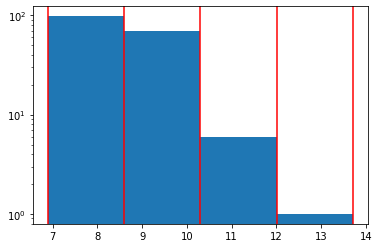

In [9]:
# sample weights
histoAR = Y_train.copy()
nbins = 4 ### works best[4 with no sqrt / 500 with sqrt normed] / 1000 with norm*100 / 4000 ok no sqrt
true_hist = np.histogram(histoAR,bins = nbins,range=(np.min(Y_train)-0.001,np.max(Y_train)+0.001))
binweight = true_hist[0][np.digitize(histoAR,true_hist[1]) - 1]
print ("true_hist[0] = ", true_hist[0])
binweight = 1/binweight
binweight = 100*binweight/np.sum(np.unique(binweight)) ## 5000/5 ok
print("sum weight:",np.sum(np.unique(binweight)))
print("true_hist",true_hist[0])
print("binweight",binweight)
print("weight_vals:",np.unique(binweight))
plt.hist(histoAR,bins=nbins)
for i in true_hist[1]:
    plt.axvline(i,color='r')
plt.yscale("log")

In [10]:
true_PU_depth1=df['hcal_edepth1_un']
true_PU_depth2=df['hcal_edepth2_un']
true_PU_depth3=df['hcal_edepth3_un']
true_PU_depth4=df['hcal_edepth4_un']
true_PU_depth5=df['hcal_edepth5_un']
true_PU_depth6=df['hcal_edepth6_un']
true_PU_depth7=df['hcal_edepth7_un']

depth1 = 'Depth: 1'
depth2 = 'Depth: 2'
depth3 = 'Depth: 3'
depth4 = 'Depth: 4'
depth5 = 'Depth: 5'
depth6 = 'Depth: 6'
depth7 = 'Depth: 7'


In [11]:
import keras.backend as kb
def custom_loss_depth1(preds_depth1,targets):
    return (((preds_depth1-targets)**2)/targets)

def custom_loss_depth2(preds_depth2,targets):
    return (((preds_depth2-targets)**2)/targets)

def custom_loss_depth3(preds_depth3,targets):
    return (((preds_depth3-targets)**2)/targets)

def custom_loss_depth4(preds_depth4,targets):
    return (((preds_depth4-targets)**2)/targets)

def custom_loss_depth5(preds_depth5,targets):
    return (((preds_depth5-targets)**2)/targets)

def custom_loss_depth6(preds_depth6,targets):
    return (((preds_depth6-targets)**2)/targets)

def custom_loss_depth7(preds_depth7,targets):
    return (((preds_depth7-targets)**2)/targets)

In [12]:
def My_model(X_train):
    PYTHONHASHSEED=0
    from numpy.random import seed
    seed(1)
    import tensorflow as tf
    tf.random.set_seed(2)

    from keras.layers import LeakyReLU
    from keras import optimizers
    
    model = Sequential()
    model.add(Dense(40, input_shape=(X_train.shape[1],)))
    model.add(LeakyReLU(alpha=0.3))
    model.add(Dropout(0.1))
    
    model.add(Dense(500))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))

    model.add(Dense(800))
    model.add(LeakyReLU(alpha=0.1))
    #model.add(Dropout(0.1))

    model.add(Dense(700))
    model.add(LeakyReLU(alpha=0.3))
    #model.add(Dropout(0.1))

    model.add(Dense(20))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dense(1))
    
    return model

In [13]:
def model_loss(history_depth):
    print(history_depth.history.keys())
    # summarize history for accuracy
    plt.plot(history_depth.history['loss'])
    plt.plot(history_depth.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt1 = plt.show()
    return plt1

In [51]:
def distribution(true_PU, preds, targets, title_depth):
    from matplotlib import gridspec
    %matplotlib inline
    i=0

    fig = plt.figure(figsize=(6,6))
    gs = gridspec.GridSpec(2,1, height_ratios=[2, 1]) 
    ax = plt.subplot(gs[0])
    
    a=round(np.mean(targets[:,i]),3)
    b=round(np.mean(preds[:,i]),3)
    ns, bins, patches = ax.hist([targets[:,i], preds[:,i], true_PU], 
                                 histtype='step', bins=100,  range=(0,20), linewidth=1.5,
                                 label=['truth no PU, Mean='+str(a),'predicted, Mean='+str(b), 'truth PU'], 
                                 color= ['red', 'green', 'yellow'], )
    
    
    ax.legend(loc='upper right')
    ax.set_yscale('log')    
    plt.xlim(0,20)
    plt.title('ieta: '+str(ieta), loc='left')
    plt.title(str(title_depth), loc='right')
    ax1 = plt.subplot(gs[1])
    ax1.plot(bins[:-1], ns[1] / ns[0], 'bo')
    
    plt.ylabel('predicted / truth no PU')
    ax1.plot([-1, 21], [1, 1])
    plt.xlim(0,20)
    plt.ylim(-2,5)
    plt.savefig('Plots/Aug04/Log/ieta'+str(ieta)+'_'+str(title_depth)+'_log.png')
    plt.savefig('Plots/Aug04/Log/ieta'+str(ieta)+'_'+str(title_depth)+'_log.pdf')
    
    plt.show()
    
    return plt
    

In [52]:
def NonLogDistribution(true_PU, preds, targets, title_depth):
    from matplotlib import gridspec
    %matplotlib inline
    i=0

    fig = plt.figure(figsize=(6,6))
    gs = gridspec.GridSpec(2,1, height_ratios=[2, 1]) 
    ax = plt.subplot(gs[0])
    
    a=round(np.mean(np.exp((targets[:,i]))/10000),3)
    b=round(np.mean(np.exp(preds[:,i])/10000),3)
    ns, bins, patches = ax.hist([(np.exp((targets[:,i]))/10000), (np.exp(preds[:,i])/10000), (np.exp(true_PU)/10000)], 
                                 histtype='step', bins=100,  range=(0,20), linewidth=1.5,
                                 label=['truth no PU, Mean='+str(a),'predicted, Mean='+str(b), 'truth PU'], 
                                 color= ['red', 'green', 'yellow'], )
    
    ax.legend(loc='upper right')
    ax.set_yscale('log')    
    plt.xlim(0,20)
    plt.title('ieta: '+str(ieta), loc='left')
    plt.title(str(title_depth), loc='right')
    ax1 = plt.subplot(gs[1])
    ax1.plot(bins[:-1], ns[1] / ns[0], 'bo')
    
    plt.ylabel('predicted / truth no PU')
    ax1.plot([-1, 21], [1, 1])
    plt.xlim(0,20)
    plt.ylim(-2,5)
 
    plt.savefig('Plots/Aug04/NonLog/ieta'+str(ieta)+'_'+str(title_depth)+'_nonLog.png')
    plt.savefig('Plots/Aug04/NonLog/ieta'+str(ieta)+'_'+str(title_depth)+'_nonLog.pdf')
    plt.show()
    
    return plt

In [16]:
def model_save(model_name,title_depth):
    import os
    if not os.path.exists('models'):
        os.makedirs('models')
    model_name.save('models/model_ieta'+str(ieta)+'_'+str(title_depth)+'.h5')

In [17]:
model1=My_model(X_train_depth1)
model2=My_model(X_train_depth2)
model3=My_model(X_train_depth3)
model4=My_model(X_train_depth4)
model5=My_model(X_train_depth5)
model6=My_model(X_train_depth6)
model7=My_model(X_train_depth7)

In [18]:
model1.compile(loss=custom_loss_depth1,optimizer='adam')
model1.summary()
print ("fitting now=========>")
history1 = model1.fit(X_train_depth1,Y_train , batch_size=5000, epochs=500, validation_split=0.2,
                      verbose=1,sample_weight=binweight)



model2.compile(loss=custom_loss_depth2,optimizer='adam')
model2.summary()
print ("fitting now=========>")
history2 = model2.fit(X_train_depth2,Y_train , batch_size=5000, epochs=500, validation_split=0.2,
                      verbose=1,sample_weight=binweight)



model3.compile(loss=custom_loss_depth3,optimizer='adam')
model3.summary()
print ("fitting now=========>")
history3 = model3.fit(X_train_depth3,Y_train , batch_size=5000, epochs=500, validation_split=0.2,
                      verbose=1,sample_weight=binweight)



model4.compile(loss=custom_loss_depth4,optimizer='adam')
model4.summary()
print ("fitting now=========>")
history4 = model4.fit(X_train_depth4,Y_train , batch_size=5000, epochs=500, validation_split=0.2,
                      verbose=1,sample_weight=binweight)


model5.compile(loss=custom_loss_depth5,optimizer='adam')
model5.summary()
print ("fitting now=========>")
history5 = model5.fit(X_train_depth5,Y_train , batch_size=5000, epochs=500, validation_split=0.2,
                      verbose=1,sample_weight=binweight)



model6.compile(loss=custom_loss_depth6,optimizer='adam')
model6.summary()
print ("fitting now=========>")
history6 = model6.fit(X_train_depth6,Y_train , batch_size=5000, epochs=500, validation_split=0.2,
                      verbose=1,sample_weight=binweight)


model7.compile(loss=custom_loss_depth7,optimizer='adam')
model7.summary()
print ("fitting now=========>")
history7 = model7.fit(X_train_depth7,Y_train , batch_size=5000, epochs=500, validation_split=0.2,
                      verbose=1,sample_weight=binweight)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                560       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 40)                0         
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               20500     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 500)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 800)               4

1/1 [==============================] - 0s 27ms/step - loss: 1.0242 - val_loss: 1.5686
Epoch 63/500
1/1 [==============================] - 0s 25ms/step - loss: 0.9114 - val_loss: 1.5938
Epoch 64/500
1/1 [==============================] - 0s 27ms/step - loss: 1.0981 - val_loss: 1.6218
Epoch 65/500
1/1 [==============================] - 0s 24ms/step - loss: 1.0748 - val_loss: 1.6520
Epoch 66/500
1/1 [==============================] - 0s 25ms/step - loss: 1.1148 - val_loss: 1.6845
Epoch 67/500
1/1 [==============================] - 0s 25ms/step - loss: 1.1649 - val_loss: 1.7194
Epoch 68/500
1/1 [==============================] - 0s 27ms/step - loss: 1.0285 - val_loss: 1.7572
Epoch 69/500
1/1 [==============================] - 0s 27ms/step - loss: 0.9623 - val_loss: 1.7968
Epoch 70/500
1/1 [==============================] - 0s 25ms/step - loss: 1.1499 - val_loss: 1.8382
Epoch 71/500
1/1 [==============================] - 0s 26ms/step - loss: 0.8360 - val_loss: 1.8819
Epoch 72/500
1/1 [=====

1/1 [==============================] - 0s 24ms/step - loss: 0.5816 - val_loss: 5.1416
Epoch 145/500
1/1 [==============================] - 0s 24ms/step - loss: 0.4891 - val_loss: 5.1631
Epoch 146/500
1/1 [==============================] - 0s 25ms/step - loss: 0.4574 - val_loss: 5.1883
Epoch 147/500
1/1 [==============================] - 0s 26ms/step - loss: 0.4559 - val_loss: 5.2145
Epoch 148/500
1/1 [==============================] - 0s 26ms/step - loss: 0.4695 - val_loss: 5.2437
Epoch 149/500
1/1 [==============================] - 0s 25ms/step - loss: 0.4278 - val_loss: 5.2741
Epoch 150/500
1/1 [==============================] - 0s 25ms/step - loss: 0.4954 - val_loss: 5.3041
Epoch 151/500
1/1 [==============================] - 0s 25ms/step - loss: 0.4684 - val_loss: 5.3359
Epoch 152/500
1/1 [==============================] - 0s 25ms/step - loss: 0.4484 - val_loss: 5.3664
Epoch 153/500
1/1 [==============================] - 0s 25ms/step - loss: 0.4437 - val_loss: 5.3932
Epoch 154/500


1/1 [==============================] - 0s 24ms/step - loss: 0.3376 - val_loss: 6.3226
Epoch 227/500
1/1 [==============================] - 0s 24ms/step - loss: 0.4295 - val_loss: 6.3372
Epoch 228/500
1/1 [==============================] - 0s 24ms/step - loss: 0.4561 - val_loss: 6.3499
Epoch 229/500
1/1 [==============================] - 0s 26ms/step - loss: 0.5363 - val_loss: 6.3574
Epoch 230/500
1/1 [==============================] - 0s 24ms/step - loss: 0.5991 - val_loss: 6.3596
Epoch 231/500
1/1 [==============================] - 0s 24ms/step - loss: 0.6028 - val_loss: 6.3595
Epoch 232/500
1/1 [==============================] - 0s 24ms/step - loss: 0.4092 - val_loss: 6.3619
Epoch 233/500
1/1 [==============================] - 0s 25ms/step - loss: 0.4278 - val_loss: 6.3641
Epoch 234/500
1/1 [==============================] - 0s 25ms/step - loss: 0.4150 - val_loss: 6.3667
Epoch 235/500
1/1 [==============================] - 0s 24ms/step - loss: 0.5288 - val_loss: 6.3642
Epoch 236/500


1/1 [==============================] - 0s 25ms/step - loss: 0.5164 - val_loss: 6.9905
Epoch 309/500
1/1 [==============================] - 0s 25ms/step - loss: 0.4344 - val_loss: 7.0053
Epoch 310/500
1/1 [==============================] - 0s 25ms/step - loss: 0.5145 - val_loss: 7.0098
Epoch 311/500
1/1 [==============================] - 0s 26ms/step - loss: 0.4900 - val_loss: 7.0131
Epoch 312/500
1/1 [==============================] - 0s 26ms/step - loss: 0.3590 - val_loss: 7.0169
Epoch 313/500
1/1 [==============================] - 0s 26ms/step - loss: 0.4658 - val_loss: 7.0125
Epoch 314/500
1/1 [==============================] - 0s 26ms/step - loss: 0.4167 - val_loss: 7.0054
Epoch 315/500
1/1 [==============================] - 0s 26ms/step - loss: 0.5131 - val_loss: 6.9927
Epoch 316/500
1/1 [==============================] - 0s 24ms/step - loss: 0.4126 - val_loss: 6.9760
Epoch 317/500
1/1 [==============================] - 0s 26ms/step - loss: 0.3970 - val_loss: 6.9518
Epoch 318/500


1/1 [==============================] - 0s 26ms/step - loss: 0.6106 - val_loss: 7.2413
Epoch 391/500
1/1 [==============================] - 0s 25ms/step - loss: 0.4520 - val_loss: 7.2013
Epoch 392/500
1/1 [==============================] - 0s 25ms/step - loss: 0.4437 - val_loss: 7.1652
Epoch 393/500
1/1 [==============================] - 0s 24ms/step - loss: 1.0637 - val_loss: 7.1204
Epoch 394/500
1/1 [==============================] - 0s 24ms/step - loss: 0.3429 - val_loss: 7.0842
Epoch 395/500
1/1 [==============================] - 0s 25ms/step - loss: 0.3613 - val_loss: 7.0572
Epoch 396/500
1/1 [==============================] - 0s 25ms/step - loss: 0.3255 - val_loss: 7.0321
Epoch 397/500
1/1 [==============================] - 0s 24ms/step - loss: 0.4603 - val_loss: 7.0019
Epoch 398/500
1/1 [==============================] - 0s 26ms/step - loss: 0.3401 - val_loss: 6.9833
Epoch 399/500
1/1 [==============================] - 0s 26ms/step - loss: 0.3921 - val_loss: 6.9662
Epoch 400/500


1/1 [==============================] - 0s 25ms/step - loss: 0.4237 - val_loss: 7.4998
Epoch 473/500
1/1 [==============================] - 0s 25ms/step - loss: 0.3087 - val_loss: 7.5237
Epoch 474/500
1/1 [==============================] - 0s 24ms/step - loss: 0.3312 - val_loss: 7.5440
Epoch 475/500
1/1 [==============================] - 0s 24ms/step - loss: 0.4125 - val_loss: 7.5588
Epoch 476/500
1/1 [==============================] - 0s 24ms/step - loss: 0.4217 - val_loss: 7.5672
Epoch 477/500
1/1 [==============================] - 0s 24ms/step - loss: 0.2945 - val_loss: 7.5852
Epoch 478/500
1/1 [==============================] - 0s 24ms/step - loss: 0.3671 - val_loss: 7.6002
Epoch 479/500
1/1 [==============================] - 0s 24ms/step - loss: 0.3261 - val_loss: 7.6057
Epoch 480/500
1/1 [==============================] - 0s 25ms/step - loss: 0.3358 - val_loss: 7.6095
Epoch 481/500
1/1 [==============================] - 0s 25ms/step - loss: 0.3231 - val_loss: 7.6114
Epoch 482/500


1/1 [==============================] - 0s 25ms/step - loss: 1.1747 - val_loss: 1.0955
Epoch 34/500
1/1 [==============================] - 0s 25ms/step - loss: 1.1053 - val_loss: 1.1186
Epoch 35/500
1/1 [==============================] - 0s 25ms/step - loss: 1.1262 - val_loss: 1.1388
Epoch 36/500
1/1 [==============================] - 0s 25ms/step - loss: 1.2861 - val_loss: 1.1553
Epoch 37/500
1/1 [==============================] - 0s 27ms/step - loss: 1.2664 - val_loss: 1.1674
Epoch 38/500
1/1 [==============================] - 0s 26ms/step - loss: 1.1359 - val_loss: 1.1755
Epoch 39/500
1/1 [==============================] - 0s 26ms/step - loss: 1.2365 - val_loss: 1.1790
Epoch 40/500
1/1 [==============================] - 0s 26ms/step - loss: 1.1770 - val_loss: 1.1784
Epoch 41/500
1/1 [==============================] - 0s 26ms/step - loss: 1.1620 - val_loss: 1.1733
Epoch 42/500
1/1 [==============================] - 0s 26ms/step - loss: 1.1463 - val_loss: 1.1640
Epoch 43/500
1/1 [=====

1/1 [==============================] - 0s 25ms/step - loss: 0.3925 - val_loss: 1.9622
Epoch 116/500
1/1 [==============================] - 0s 24ms/step - loss: 0.3603 - val_loss: 1.9825
Epoch 117/500
1/1 [==============================] - 0s 25ms/step - loss: 0.5142 - val_loss: 1.9998
Epoch 118/500
1/1 [==============================] - 0s 24ms/step - loss: 0.3385 - val_loss: 2.0163
Epoch 119/500
1/1 [==============================] - 0s 25ms/step - loss: 0.2969 - val_loss: 2.0330
Epoch 120/500
1/1 [==============================] - 0s 24ms/step - loss: 0.3308 - val_loss: 2.0497
Epoch 121/500
1/1 [==============================] - 0s 24ms/step - loss: 0.4418 - val_loss: 2.0637
Epoch 122/500
1/1 [==============================] - 0s 25ms/step - loss: 0.4382 - val_loss: 2.0762
Epoch 123/500
1/1 [==============================] - 0s 26ms/step - loss: 0.3985 - val_loss: 2.0862
Epoch 124/500
1/1 [==============================] - 0s 25ms/step - loss: 0.3555 - val_loss: 2.0958
Epoch 125/500


1/1 [==============================] - 0s 25ms/step - loss: 0.4141 - val_loss: 2.4798
Epoch 198/500
1/1 [==============================] - 0s 25ms/step - loss: 0.3129 - val_loss: 2.4767
Epoch 199/500
1/1 [==============================] - 0s 26ms/step - loss: 0.3420 - val_loss: 2.4747
Epoch 200/500
1/1 [==============================] - 0s 25ms/step - loss: 0.2490 - val_loss: 2.4756
Epoch 201/500
1/1 [==============================] - 0s 26ms/step - loss: 0.5767 - val_loss: 2.4754
Epoch 202/500
1/1 [==============================] - 0s 27ms/step - loss: 0.2846 - val_loss: 2.4769
Epoch 203/500
1/1 [==============================] - 0s 25ms/step - loss: 0.2316 - val_loss: 2.4804
Epoch 204/500
1/1 [==============================] - 0s 25ms/step - loss: 0.2487 - val_loss: 2.4834
Epoch 205/500
1/1 [==============================] - 0s 25ms/step - loss: 0.4126 - val_loss: 2.4835
Epoch 206/500
1/1 [==============================] - 0s 26ms/step - loss: 0.2527 - val_loss: 2.4833
Epoch 207/500


1/1 [==============================] - 0s 24ms/step - loss: 0.2798 - val_loss: 2.4844
Epoch 280/500
1/1 [==============================] - 0s 24ms/step - loss: 0.1942 - val_loss: 2.4851
Epoch 281/500
1/1 [==============================] - 0s 24ms/step - loss: 0.2541 - val_loss: 2.4871
Epoch 282/500
1/1 [==============================] - 0s 24ms/step - loss: 0.2325 - val_loss: 2.4905
Epoch 283/500
1/1 [==============================] - 0s 25ms/step - loss: 0.2424 - val_loss: 2.4957
Epoch 284/500
1/1 [==============================] - 0s 24ms/step - loss: 0.2731 - val_loss: 2.5004
Epoch 285/500
1/1 [==============================] - 0s 24ms/step - loss: 0.2325 - val_loss: 2.5082
Epoch 286/500
1/1 [==============================] - 0s 25ms/step - loss: 0.4157 - val_loss: 2.5130
Epoch 287/500
1/1 [==============================] - 0s 25ms/step - loss: 0.4866 - val_loss: 2.5132
Epoch 288/500
1/1 [==============================] - 0s 24ms/step - loss: 0.2279 - val_loss: 2.5134
Epoch 289/500


1/1 [==============================] - 0s 26ms/step - loss: 0.2166 - val_loss: 2.4589
Epoch 362/500
1/1 [==============================] - 0s 26ms/step - loss: 0.2035 - val_loss: 2.4678
Epoch 363/500
1/1 [==============================] - 0s 27ms/step - loss: 0.1892 - val_loss: 2.4792
Epoch 364/500
1/1 [==============================] - 0s 26ms/step - loss: 0.2950 - val_loss: 2.4859
Epoch 365/500
1/1 [==============================] - 0s 28ms/step - loss: 0.2126 - val_loss: 2.4923
Epoch 366/500
1/1 [==============================] - 0s 26ms/step - loss: 0.1933 - val_loss: 2.4990
Epoch 367/500
1/1 [==============================] - 0s 26ms/step - loss: 0.2060 - val_loss: 2.5070
Epoch 368/500
1/1 [==============================] - 0s 27ms/step - loss: 0.1724 - val_loss: 2.5148
Epoch 369/500
1/1 [==============================] - 0s 26ms/step - loss: 0.1720 - val_loss: 2.5230
Epoch 370/500
1/1 [==============================] - 0s 26ms/step - loss: 0.2299 - val_loss: 2.5293
Epoch 371/500


1/1 [==============================] - 0s 24ms/step - loss: nan - val_loss: nan
Epoch 44/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 45/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 46/500
1/1 [==============================] - 0s 25ms/step - loss: nan - val_loss: nan
Epoch 47/500
1/1 [==============================] - 0s 25ms/step - loss: nan - val_loss: nan
Epoch 48/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 49/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 50/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 51/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 52/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 53/500
1/1 [==============================] - 0s 25ms/step - loss: nan - val_

Epoch 131/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 132/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 133/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 134/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 135/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 136/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 137/500
1/1 [==============================] - 0s 27ms/step - loss: nan - val_loss: nan
Epoch 138/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 139/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 140/500
1/1 [==============================] - 0s 27ms/step - loss: nan - val_loss: nan
Epoch 141/500
1/1 [==============================] - 0s 25ms

1/1 [==============================] - 0s 24ms/step - loss: nan - val_loss: nan
Epoch 219/500
1/1 [==============================] - 0s 25ms/step - loss: nan - val_loss: nan
Epoch 220/500
1/1 [==============================] - 0s 25ms/step - loss: nan - val_loss: nan
Epoch 221/500
1/1 [==============================] - 0s 24ms/step - loss: nan - val_loss: nan
Epoch 222/500
1/1 [==============================] - 0s 25ms/step - loss: nan - val_loss: nan
Epoch 223/500
1/1 [==============================] - 0s 24ms/step - loss: nan - val_loss: nan
Epoch 224/500
1/1 [==============================] - 0s 25ms/step - loss: nan - val_loss: nan
Epoch 225/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 226/500
1/1 [==============================] - 0s 27ms/step - loss: nan - val_loss: nan
Epoch 227/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 228/500
1/1 [==============================] - 0s 27ms/step - loss: 

1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 306/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 307/500
1/1 [==============================] - 0s 27ms/step - loss: nan - val_loss: nan
Epoch 308/500
1/1 [==============================] - 0s 27ms/step - loss: nan - val_loss: nan
Epoch 309/500
1/1 [==============================] - 0s 25ms/step - loss: nan - val_loss: nan
Epoch 310/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 311/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 312/500
1/1 [==============================] - 0s 25ms/step - loss: nan - val_loss: nan
Epoch 313/500
1/1 [==============================] - 0s 25ms/step - loss: nan - val_loss: nan
Epoch 314/500
1/1 [==============================] - 0s 25ms/step - loss: nan - val_loss: nan
Epoch 315/500
1/1 [==============================] - 0s 24ms/step - loss: 

1/1 [==============================] - 0s 25ms/step - loss: nan - val_loss: nan
Epoch 393/500
1/1 [==============================] - 0s 27ms/step - loss: nan - val_loss: nan
Epoch 394/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 395/500
1/1 [==============================] - 0s 25ms/step - loss: nan - val_loss: nan
Epoch 396/500
1/1 [==============================] - 0s 25ms/step - loss: nan - val_loss: nan
Epoch 397/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 398/500
1/1 [==============================] - 0s 25ms/step - loss: nan - val_loss: nan
Epoch 399/500
1/1 [==============================] - 0s 30ms/step - loss: nan - val_loss: nan
Epoch 400/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 401/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 402/500
1/1 [==============================] - 0s 27ms/step - loss: 

1/1 [==============================] - 0s 25ms/step - loss: nan - val_loss: nan
Epoch 480/500
1/1 [==============================] - 0s 24ms/step - loss: nan - val_loss: nan
Epoch 481/500
1/1 [==============================] - 0s 25ms/step - loss: nan - val_loss: nan
Epoch 482/500
1/1 [==============================] - 0s 25ms/step - loss: nan - val_loss: nan
Epoch 483/500
1/1 [==============================] - 0s 24ms/step - loss: nan - val_loss: nan
Epoch 484/500
1/1 [==============================] - 0s 25ms/step - loss: nan - val_loss: nan
Epoch 485/500
1/1 [==============================] - 0s 26ms/step - loss: nan - val_loss: nan
Epoch 486/500
1/1 [==============================] - 0s 25ms/step - loss: nan - val_loss: nan
Epoch 487/500
1/1 [==============================] - 0s 27ms/step - loss: nan - val_loss: nan
Epoch 488/500
1/1 [==============================] - 0s 25ms/step - loss: nan - val_loss: nan
Epoch 489/500
1/1 [==============================] - 0s 26ms/step - loss: 

dict_keys(['loss', 'val_loss'])


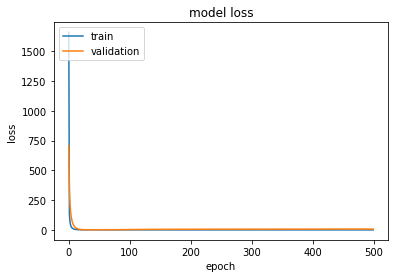

dict_keys(['loss', 'val_loss'])


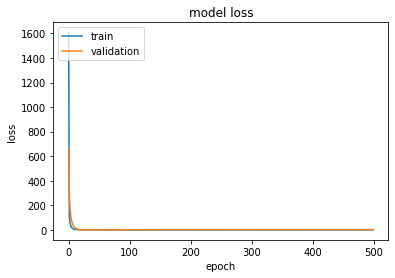

dict_keys(['loss', 'val_loss'])


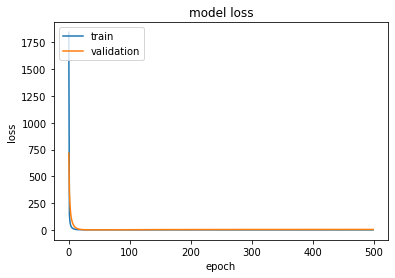

dict_keys(['loss', 'val_loss'])


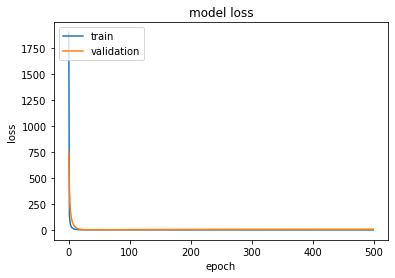

dict_keys(['loss', 'val_loss'])


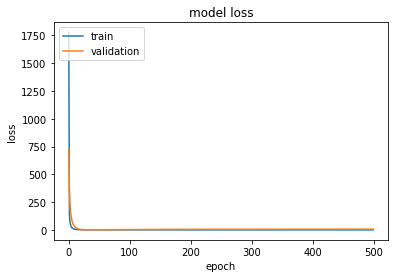

dict_keys(['loss', 'val_loss'])


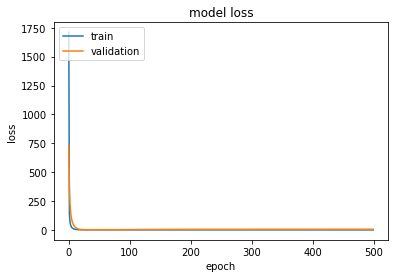

In [19]:
model_loss(history1)
model_loss(history2)
model_loss(history3)
model_loss(history4)
model_loss(history5)
model_loss(history6)
if ieta in range (26,28):
    model_loss(history7)

In [20]:
# evaluate model
preds1 = model1.predict(X_test[:,np.r_[0:12,12]])
preds2 = model2.predict(X_test[:,np.r_[0:12,13]])
preds3 = model3.predict(X_test[:,np.r_[0:12,14]])
preds4 = model4.predict(X_test[:,np.r_[0:12,15]])
preds5 = model5.predict(X_test[:,np.r_[0:12,16]])
preds6 = model6.predict(X_test[:,np.r_[0:12,17]])
preds7 = model7.predict(X_test[:,np.r_[0:12,18]])

targets = X_test[:,20]
uncorrected = X_test[:,27]
targets = targets.reshape(targets.shape[0],1)
uncorrected = uncorrected.reshape(uncorrected.shape[0],1)

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


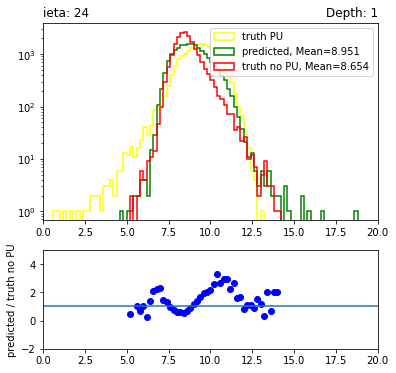

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


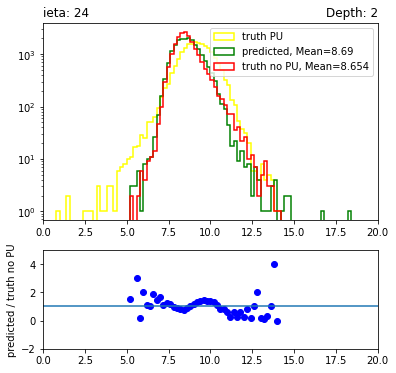

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


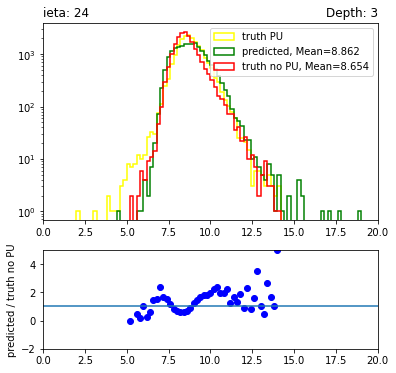

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


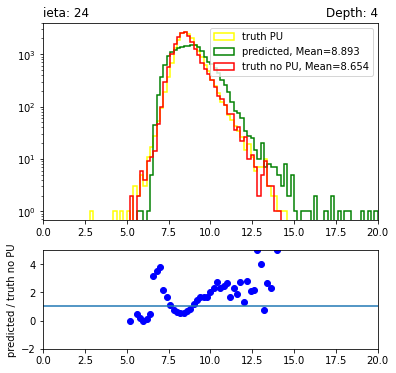

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


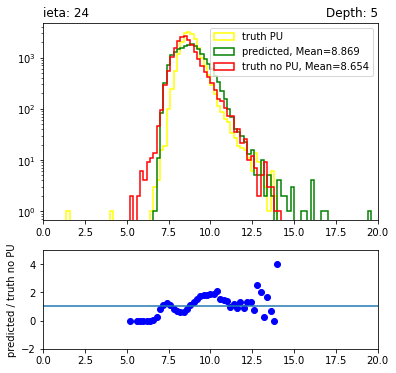

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


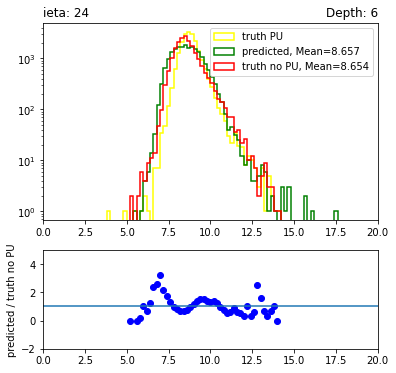

In [53]:
distribution(true_PU_depth1, preds1, targets, depth1)
distribution(true_PU_depth2, preds2, targets, depth2)
distribution(true_PU_depth3, preds3, targets, depth3)
distribution(true_PU_depth4, preds4, targets, depth4)
distribution(true_PU_depth5, preds5, targets, depth5)
distribution(true_PU_depth6, preds6, targets, depth6)
if ieta in range (26,28):
    distribution(true_PU_depth7, preds7, targets, depth7)


/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


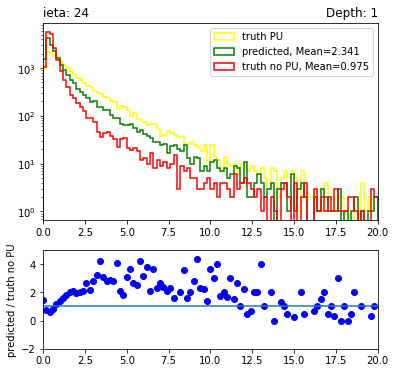

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


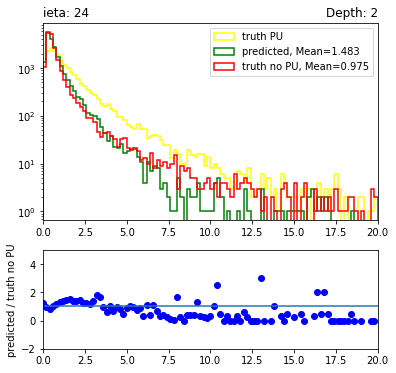

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


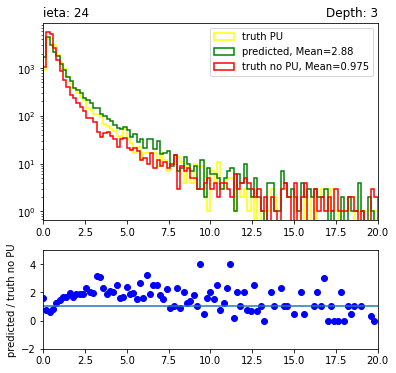

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


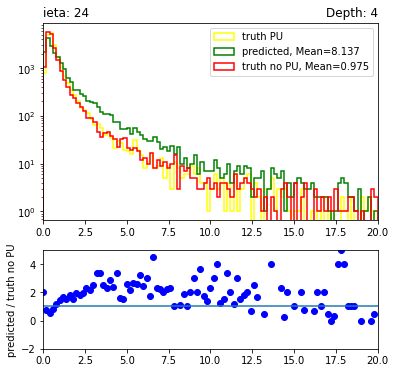

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


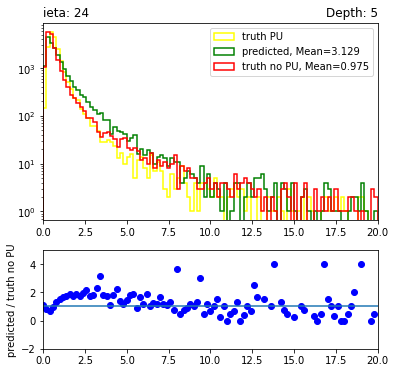

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


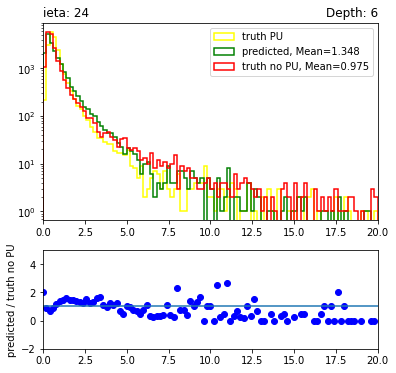

In [54]:
NonLogDistribution(true_PU_depth1, preds1, targets, depth1)
NonLogDistribution(true_PU_depth2, preds2, targets, depth2)
NonLogDistribution(true_PU_depth3, preds3, targets, depth3)
NonLogDistribution(true_PU_depth4, preds4, targets, depth4)
NonLogDistribution(true_PU_depth5, preds5, targets, depth5)
NonLogDistribution(true_PU_depth6, preds6, targets, depth6)
if ieta in range (26,28):
    NonLogDistribution(true_PU_depth7, preds7, targets, depth7)

In [23]:
model_save(model1, depth1)
model_save(model2, depth2)
model_save(model3, depth3)
model_save(model4, depth4)
model_save(model5, depth5)
model_save(model6, depth6)
if ieta in range (26,28):
    model_save(model7, depth7)